In [1]:
##############################
#  Using Regression for Exponential Growth in Regards to Corona Virus
##############################

In [16]:
##############################
# Testing Exponential Growth both due to EDA and generally epidemiologists have studied outnreaks and identified the first period of an epidemic as that of following exponential growth. #
##############################

In [63]:
#data accessed through
#https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
#Exponential Growth Modelling Information Credits
#https://towardsdatascience.com/modeling-logistic-growth-1367dc971de2

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [41]:
df = pd.read_csv('time_series_covid19_confirmed_global.txt',delimiter=',')

In [42]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [43]:
#all we need is the time-series data vs number of cases, do not need the first four columns in this case
df = df.iloc[:,4:]

In [44]:
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,0,0,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,0,0,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,0,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [45]:
#No Null Values
df.isnull().sum().sum()

0

In [46]:
#Need to restructure data so we have a sum for the total of each day
#Need to sum each column
daily_cases = df.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head()

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

Text(0.5, 1.0, 'COVID 19 Cases from 1.22.2020 to 3.27.2020')

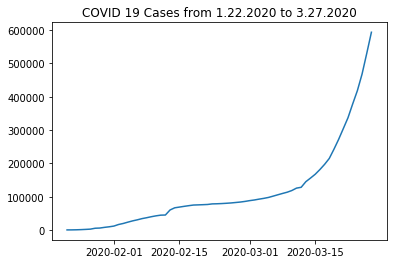

In [47]:
plt.plot(daily_cases)
plt.title("COVID 19 Cases from 1.22.2020 to 3.27.2020") #looks exponential

In [52]:
#Restructuring data into a dataframe
df = daily_cases.to_frame()
df.reset_index(level=0, inplace=True)
df.columns = ['Date','ConfirmedCases']
df.head()

,Date,ConfirmedCases
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [53]:
df

,Date,ConfirmedCases
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
61,2020-03-23,378235
62,2020-03-24,418045
63,2020-03-25,467653
64,2020-03-26,529591


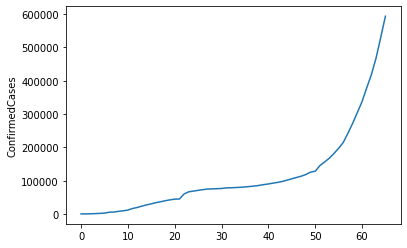

In [21]:
#Index represents one day at a time in the time-series plot
sns.lineplot(x=df.index,y='ConfirmedCases',data=df)

In [17]:
#Exponential Growth Formula
# x(t) = x0 * b^t
# x0: initial time
# x(t): cases/value at time t
# b: growth factor, number of people infected by each sick person

In [28]:
#Applying log transformation to model exponential growth of cases
df['logCases'] = np.log(df.ConfirmedCases) #already 555 cases
df.head()

,Date,ConfirmedCases,logCases
0,2020-01-22,555,6.318968
1,2020-01-23,654,6.483107
2,2020-01-24,941,6.846943
3,2020-01-25,1434,7.268223
4,2020-01-26,2118,7.658228


In [29]:
#Linear Regression/OLS Approach
X = df.index
X = sm.add_constant(X)

In [30]:
y = df.logCases

In [31]:
model = sm.OLS(y, X)
res_stat = model.fit()
res_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logCases   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     284.1
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           3.17e-25
Time:                        01:26:34   Log-Likelihood:                -67.529
No. Observations:                  66   AIC:                             139.1
Df Residuals:                      64   BIC:                             143.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4782      0.166     50.952      0.000       8.146       8.811
x1             0.0745      0.004     16.856      0.000       0.066       0.083
==============================================================================
Omnibus:                       16.739   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.650
Skew:                          -1.089   Prob(JB):                     3.28e-05
Kurtosis:                       4.662   Cond. No.                         74.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
np.exp(8.4782)

4808.786286644599

In [35]:
np.exp(.0745)

1.0773453435222549

In [36]:
def linear_predictions(t):
    return np.exp(8.4782) * np.exp(.0745) ** t

In [55]:
df.reset_index(inplace=True)

In [59]:
df.columns = ['Days','Date','ConfirmedCases']

In [60]:
df.head()

,Days,Date,ConfirmedCases
0,0,2020-01-22,555
1,1,2020-01-23,654
2,2,2020-01-24,941
3,3,2020-01-25,1434
4,4,2020-01-26,2118


In [64]:
df['Predictions'] = df.Days.apply(linear_predictions)
df.head(10)

,Days,Date,ConfirmedCases,Predictions
0,0,2020-01-22,555,4808.786287
1,1,2020-01-23,654,5180.723514
2,2,2020-01-24,941,5581.428354
3,3,2020-01-25,1434,6013.125847
4,4,2020-01-26,2118,6478.213131
5,5,2020-01-27,2927,6979.272752
6,6,2020-01-28,5578,7519.087000
7,7,2020-01-29,6166,8100.653367
8,8,2020-01-30,8234,8727.201184
9,9,2020-01-31,9927,9402.209558


In [68]:
#import logging
#logging.getLogger().setLevel(logging.CRITICAL)

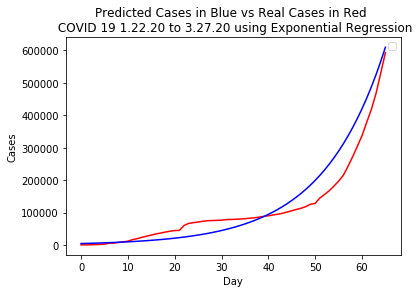

In [87]:
#Visualized Confirmed vs Predicted
plt.plot(df.Days, df.ConfirmedCases, 'red')
plt.plot(df.Days, df.Predictions, 'blue')
plt.title('Predicted Cases in Blue vs Real Cases in Red \n COVID 19 1.22.20 to 3.27.20 using Exponential Regression')
plt.xlabel('Day')
plt.ylabel('Cases')
plt.legend()
#plt.figure(figsize=(40,20))
plt.savefig("ExpPredicted_vsConfirmedCases.png")

In [75]:
##################
#See a pretty initial accurate growth of the pandemic. However, this is only factoring in the first stage and the 
# limited data we have, to truly assess the future growth there are many other miscellaneous factors the model may 
# not be able to account for over time. #
##################